# Convolutional Neural Network - Sequential Networks

## Keras

There are many deep learning libraries available, some are more popular than the others, and some get used for very specific tasks. Natural Language Processing or Computer Vision are some of the hardest problems in Artificial Intelligence. Keras is a popular Deep Learning package that has made the process of solving Deep Learning problems similar to building Lego blocks.
Keras is currently one of the most commonly used deep learning libraries today. 

Keras was built as a high-level API for other deep learning libraries, which means Keras does not perform low-level tensor operations, instead it provides an interface to its backend which is built for such operations. 

This allows Keras to abstract a lot of the underlying details and allows the programmer to concentrate on the architecture of the model. Currently Keras supports **TensorFlow, Theano, and CNTK** as its backend.

Keras has two API models
 - Sequential
 - Functional
 

### Sequential Model
**The sequential model** is helpful when your model is simply one layer after the other. You can use model.add() to stack layers and model.compile to compile the model with required loss function and optimizers. The example at the beginning uses the sequential model. As you can see, the sequential model is simple to use. In python, mostly **TensorFlow** is a backend used by Keras. Models created for MNIST classification in TensorFlow and Keras are nearly identical and applies to the same problem. But if you compare the codes, you get an idea of the abstraction Keras provides you. The entire model is defined within 10 lines of code!

```python

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

```

### Functional Model
**The functional model** brings out the real power of Keras. If you want to build complex models with multiple inputs or models with shared layers, functional API is the way to go. Let’s see an example:
```python
from keras.layers import Input, Dense
from keras.models import Model
# This returns a tensor
inputs = Input(shape=(784,))
# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation=’relu’)(inputs)
x = Dense(64, activation=’relu’)(x)
predictions = Dense(10, activation=’softmax’)(x)
# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=’rmsprop’,loss=’categorical_crossentropy’,metrics=[‘accuracy’])
model.fit(data, labels) # starts training
```

### Sequential API vs Functional API
 - In Functional API, the layers take a more functional form as compared to the sequential model.
 - In Functional API, The inputs to each layer are explicitly specified and you have access to the output of each layer. 
 - The functional API allows you to share the tensors with multiple layers.
 - The functional API also gives you control over the model inputs and outputs as seen above.

# MNIST Classification using Keras

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Load Dataset

The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [16]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

## Preview Images from Dataset

4


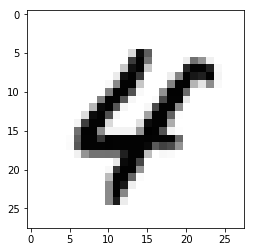

In [17]:
image_index = 12098
print(Y_train[image_index]) 
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

## Standarize Dataset

In [18]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train /= 255
X_test /= 255


print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 60000
number of test examples = 10000
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000,)


# Create Model

In [7]:
# Creating a Sequential Model and adding the layers
#CONV2D ->  MAXPOOL ->  RELU -> FLATTEN -> FULLYCONNECTED -> RELU ->SOFTMAX
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Train Model

In [8]:
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 55s 917us/step - loss: 0.2069 - acc: 0.9381
Epoch 2/10
60000/60000 [==============================] - 57s 949us/step - loss: 0.0850 - acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 60s 992us/step - loss: 0.0568 - acc: 0.9825
Epoch 4/10
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0433 - acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0352 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0282 - acc: 0.9903
Epoch 7/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0252 - acc: 0.9913
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0206 - acc: 0.9925
Epoch 9/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0185 - acc: 0.9936
Epoch 10/10
60000/60000 [=====================

## Check Accuracy

In [31]:
print ("On the training set:")
Loss,acc=model.evaluate(X_train, Y_train,verbose=3)  #verbose=3 Hide internal outputs
print("   Loss=",Loss)
print("   Accuracy=",acc*100)

print ("On the Test set:")
Loss,acc=model.evaluate(X_test, Y_test,verbose=3) #verbose=3 Hide internal outputs
print("   Loss=",Loss)
print("   Accuracy=",acc*100)

On the training set:
   Loss= 0.004428645781596061
   Accuracy= 99.86
On the Test set:
   Loss= 0.05779229174169741
   Accuracy= 98.7


In [53]:
def predict(X,model):
    X=X.reshape(X.shape[0], 28, 28, 1)
    pred = model.predict(X)
    p =pred.argmax(axis=1)
    return p

Value Predicted= 9  and Actual Image is


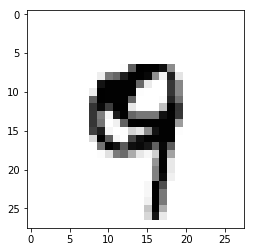

Value Predicted= 2  and Actual Image is


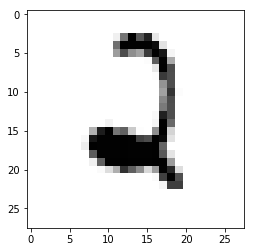

Value Predicted= 6  and Actual Image is


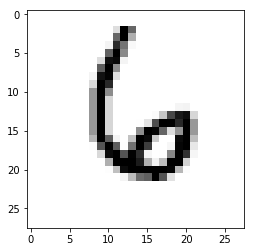

Value Predicted= 0  and Actual Image is


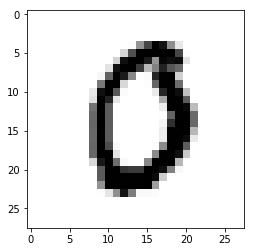

Value Predicted= 0  and Actual Image is


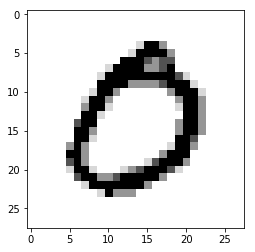

In [56]:
image_index = 4444
image_count=5
pX=X_test[image_index:image_index+image_count]
pY = predict(pX,model)

for i in range(image_count):
    print("Value Predicted=",pY[i]," and Actual Image is")
    plt.imshow(X_test[image_index+i].reshape(28, 28),cmap='Greys')
    plt.show()
